<a href="https://colab.research.google.com/github/AzkaTsurayya/Folder-Tugas-DAA/blob/main/DAA_Pertemuan_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Studi Kasus 1

In [ ]:
#Adjacency Matrix
import numpy as np

# Define the adjacency matrix
adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 0, 1, 0]])

# Set the damping factor
damping_factor = 0.85

# Initialize the PageRank values
num_pages = len(adjacency_matrix)
page_rank = np.ones(num_pages) / num_pages

# Number of iterations
num_iterations = 100

for i in range(num_iterations):
    new_page_rank = np.zeros(num_pages)
    for j in range(num_pages):
      # Calculate the PageRank contribution from each linking page
      linking_pages = [k for k in range(num_pages) if adjacency_matrix[k, j] == 1]
      for linking_page in linking_pages:
        new_page_rank[j] += page_rank[linking_page] / sum(adjacency_matrix[linking_page, :])
      new_page_rank[j] = damping_factor * new_page_rank[j] + (1 - damping_factor) / num_pages
    page_rank = new_page_rank

# Print the final PageRank values
for page, rank in enumerate(page_rank):
    print(f"PR(Page {page + 1}) = {rank:.3f}")

PR(Page 1) = 0.122
PR(Page 2) = 0.302
PR(Page 3) = 0.378
PR(Page 4) = 0.198


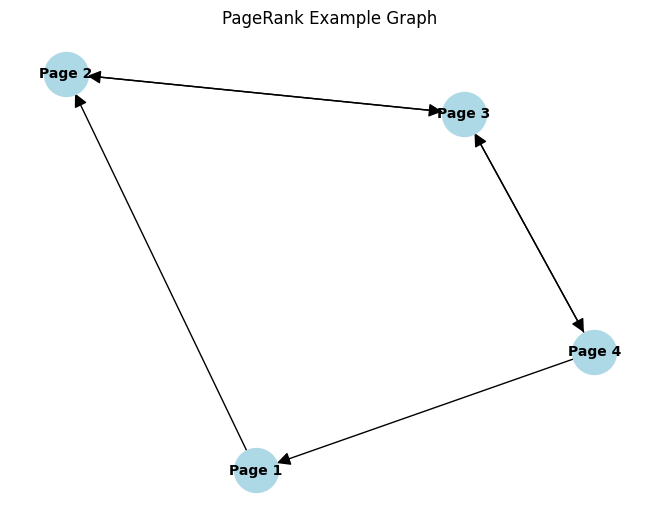

In [ ]:
#Membuat Graph dari Adjacency Matrix
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Define the adjacency matrix
adjacency_matrix = np.array([[0, 1, 0, 0],
                             [0, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 0, 1, 0]])

# Create a directed graph
G = nx.DiGraph()

# Add nodes
num_pages = len(adjacency_matrix)
G.add_nodes_from(range(num_pages))

# Add edges based on the adjacency matrix
for i in range(num_pages):
    for j in range(num_pages):
        if adjacency_matrix[i, j] == 1:
            G.add_edge(i, j)

# Draw the graph
pos = nx.spring_layout(G) # Layout the graph
labels = {i: f"Page {i+1}" for i in range(num_pages)}
nx.draw(G, pos, with_labels=True, labels=labels, node_size=1000, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', arrowsize=20)
plt.title("PageRank Example Graph")
plt.show()

In [ ]:
# PageRank dengan adjacency matrix 5x5
import numpy as np

# Adjacency Matrix (dari gambar)
adjacency_matrix = np.array([
    [0, 1, 0, 0, 1],
    [1, 0, 1, 1, 1],
    [0, 1, 0, 1, 0],
    [0, 1, 1, 0, 1],
    [1, 1, 0, 1, 0]
])

# Damping factor
damping_factor = 0.85

# Inisialisasi PageRank (semua sama di awal)
num_pages = len(adjacency_matrix)
page_rank = np.ones(num_pages) / num_pages

# Jumlah iterasi
num_iterations = 100

for i in range(num_iterations):
    new_page_rank = np.zeros(num_pages)
    for j in range(num_pages):
        # Temukan semua halaman yang menaut ke halaman j
        linking_pages = [k for k in range(num_pages) if adjacency_matrix[k, j] == 1]
        for linking_page in linking_pages:
            out_links = np.sum(adjacency_matrix[linking_page, :])
            if out_links > 0:
                new_page_rank[j] += page_rank[linking_page] / out_links
        new_page_rank[j] = damping_factor * new_page_rank[j] + (1 - damping_factor) / num_pages
    page_rank = new_page_rank

# Tampilkan hasil PageRank
for page, rank in enumerate(page_rank, start=1):
    print(f"PR(Page {page}) = {rank:.4f}")


PR(Page 1) = 0.1491
PR(Page 2) = 0.2771
PR(Page 3) = 0.1491
PR(Page 4) = 0.2124
PR(Page 5) = 0.2124


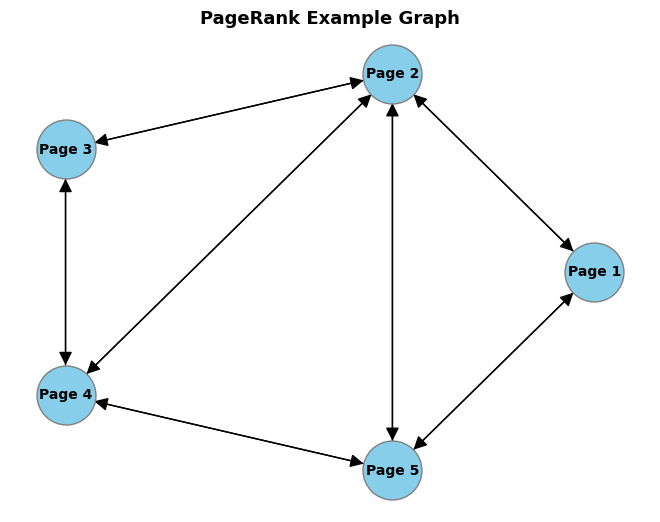

In [ ]:
# Membuat Graph dari Adjacency Matrix
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Adjacency Matrix
adjacency_matrix = np.array([
    [0, 1, 0, 0, 1],
    [1, 0, 1, 1, 1],
    [0, 1, 0, 1, 0],
    [0, 1, 1, 0, 1],
    [1, 1, 0, 1, 0]
])

# Create a directed graph
G = nx.DiGraph()

# Add nodes
num_pages = len(adjacency_matrix)
G.add_nodes_from(range(num_pages))

# Add edges based on the adjacency matrix
for i in range(num_pages):
    for j in range(num_pages):
        if adjacency_matrix[i, j] == 1:
            G.add_edge(i, j)

# Draw the graph
pos = nx.circular_layout(G)
labels = {i: f"Page {i+1}" for i in range(num_pages)}
nx.draw(
    G,
    pos,
    with_labels=True,
    labels=labels,
    node_size=1800,
    node_color='skyblue',
    font_size=10,
    font_color='black',
    font_weight='bold',
    arrowsize=20,
    edgecolors='gray'
)
plt.title("PageRank Example Graph", fontsize=13, fontweight='bold')
plt.show()

# Studi Kasus 2

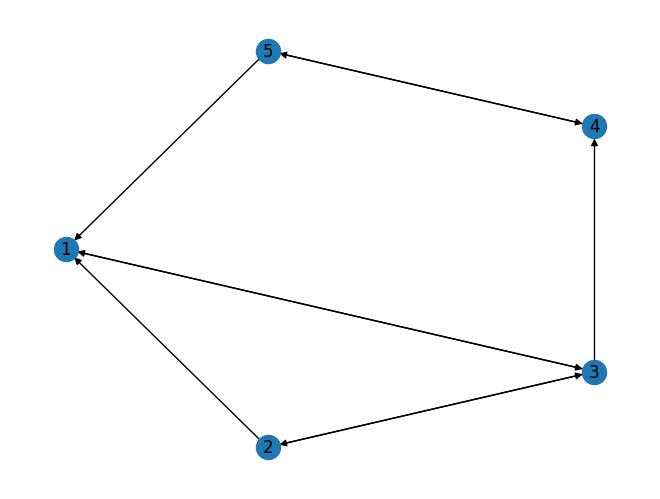

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

myWeb = nx.DiGraph()
myPages = range(1,5)

connections = [(1,3),(2,1),(2,3),(3,1),(3,2),(3,4),(4,5),(5,1),(5,4)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connections)

pos=nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True)
plt.show()

In [ ]:
import networkx as nx
import numpy as np
def CreatePageRank(aGraph):
    nodes_set = len(aGraph)
    M = nx.to_numpy_array(aGraph) # Menggunakan metode to_numpy_array
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))
    prob_outwards = np.array(1.0 / outwards)
    G = np.multiply(M, prob_outwards[:, np.newaxis])

    p = np.ones(nodes_set) / float(nodes_set)
    return G, page

# Contoh penggunaan:
myWeb = nx.DiGraph()
connections = [(1,3),(2,1),(2,3),(3,1),(3,2),(3,4),(4,5),(5,1),(5,4)]
myWeb.add_edges_from(connections)

G, p = CreatePageRank(myWeb)
print(G)

[[0.         1.         0.         0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.        ]
 [0.5        0.5        0.         0.         0.        ]
 [0.         0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5        0.        ]]


# Studi Kasus 3

In [ ]:
import numpy as np

# Matriks adjacency (0 berarti tidak ada tautan, 1 berarti ada tautan)
adjacency_matrix = np.array([
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [1, 0, 0, 0, 0],
    [0, 0, 1, 0, 1],
    [0, 0, 1, 1, 0]
])

# Inisialisasi nilai awal PageRank
pagerank = np.array([1, 1, 1, 1, 1], dtype=float)

# Faktor damping
damping_factor = 0.85

# Jumlah iterasi
num_iterations = 100

for _ in range(num_iterations):
    # Inisialisasi PageRank baru
    new_page_rank = np.zeros(pagerank.shape, dtype=float)

    for i in range(adjacency_matrix.shape[0]):
        for j in range(adjacency_matrix.shape[1]):
            # Hitung jumlah tautan keluar dari halaman i
            num_outlinks = np.sum(adjacency_matrix[i, :])

            # Perbarui PageRank berdasarkan rumus PageRank
            if num_outlinks > 0:
                new_page_rank[j] += damping_factor * (pagerank[i] / num_outlinks)
    # Normalisasi PageRank
    new_page_rank += (1 - damping_factor) / len(pagerank)

    # Perbarui PageRank
    pagerank = new_page_rank

# Hasil PageRank
print("Hasil PageRank:")
print(pagerank)

Hasil PageRank:
[1.72510772e+45 1.72510772e+45 1.72510772e+45 1.72510772e+45
 1.72510772e+45]


In [ ]:
import numpy as np

# Jumlah halaman
num_pages = 5

# Vectors of outlinks
outlinks = np.array([3, 2, 1, 2, 2])

# Vectors of inlinks
inlinks = np.array([1, 2, 1, 2, 1])

# Inisialisasi nilai awal PageRank
pagerank = np.ones(num_pages, dtype=float) / num_pages

# Faktor damping
damping_factor = 0.85

# Jumlah iterasi
num_iterations = 100

for _ in range(num_iterations):
    # Inisialisasi PageRank baru
    new_page_rank = np.zeros(num_pages, dtype=float)

    for i in range(num_pages):
        for j in range(num_pages):
            if i != j and outlinks[j] > 0:
                new_page_rank[i] += damping_factor * (pagerank[j] / outlinks[j])

    # Terapkan faktor damping dan tambahkan nilai konstan
    pagerank = (1 - damping_factor) / num_pages + damping_factor * new_page_rank

# Hasil PageRank
print("Hasil PageRank:")
for i, pr in enumerate(pagerank):
    print(f"Halaman {chr(ord('A')+i)}: {pr:.4f}")

Hasil PageRank:
Halaman A: 35550623347429695488.0000
Halaman B: 33355304449451474944.0000
Halaman C: 28141863054790529024.0000
Halaman D: 33355304449451474944.0000
Halaman E: 33355304449451474944.0000


# Latihan 1

In [5]:
import numpy as np

num_pages = 6

adj = np.zeros((num_pages, num_pages), dtype=int)
edge = [(1,2), (2,3), (3,4), (4,5), (5,6)]
for u, v in edge:
    adj[v-1, u-1] = 1

outlinks = adj.sum(axis=0)

pagerank = np.ones(num_pages, dtype=float) / num_pages
damping_factor = 0.85
num_iterations = 100

for _ in range(num_iterations):
    new_page_rank = np.zeros(num_pages, dtype=float)
    for i in range(num_pages): # Iterate through receiving pages
        for j in range(num_pages): # Iterate through linking pages
            if adj[i, j] == 1: # If there is a link from j to i
                if outlinks[j] > 0:
                    new_page_rank[i] += pagerank[j] / outlinks[j]
            # Handle sink nodes (pages with no outlinks)
            elif outlinks[j] == 0:
                 new_page_rank[i] += pagerank[j] / num_pages # Distribute PR to all pages

    pagerank = (1 - damping_factor) / num_pages + damping_factor * new_page_rank


print("Hasil PageRank (Image 1 - chain 1->2->3->4->5->6):")
for i, pr in enumerate(pagerank, start=1):
    print(f"Node {i}: {pr:.6f}")

Hasil PageRank (Image 1 - chain 1->2->3->4->5->6):
Node 1: 0.060716
Node 2: 0.112325
Node 3: 0.156192
Node 4: 0.193479
Node 5: 0.225174
Node 6: 0.252114


/tmp/ipython-input-27978473.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


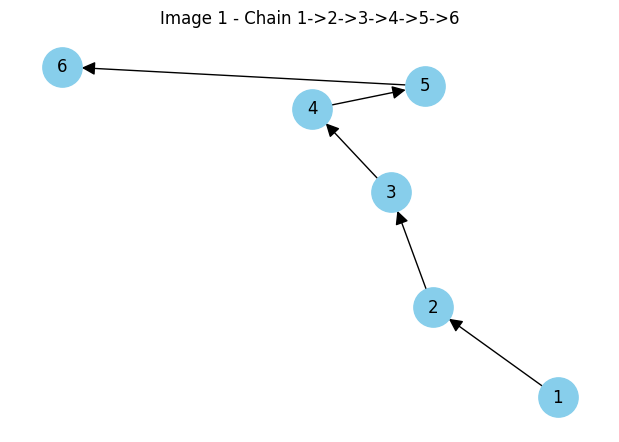

In [11]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Adjacency matrix untuk Image 1 (chain 1->2->3->4->5->6)
num_pages = 6
adjacency_matrix = np.zeros((num_pages, num_pages), dtype=int)
edges = [(1,2), (2,3), (3,4), (4,5), (5,6)]
for u, v in edges:
    adjacency_matrix[v-1, u-1] = 1  # baris target, kolom source

# Create directed graph
G = nx.DiGraph()
G.add_nodes_from(range(1, num_pages+1))
G.add_edges_from(edges)

pos = nx.spring_layout(G, seed=42)
labels = {i: f"{i}" for i in range(1, num_pages+1)}
plt.figure(figsize=(6,4))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=800, node_color='skyblue', arrowsize=20)
plt.title("Image 1 - Chain 1->2->3->4->5->6")
plt.tight_layout()
plt.show()

# Latihan 2

In [7]:
import numpy as np

num_pages = 5
adj = np.zeros((num_pages, num_pages), dtype=int)
edges = [(1,2), (2,3), (3,4), (4,5), (5,1)]
for u, v in edges:
    adj[v-1, u-1] = 1

outlinks = adj.sum(axis=0)
inlinks = adj.sum(axis=1)

pagerank = np.ones(num_pages, dtype=float) / num_pages
damping_factor = 0.85
num_iterations = 100

for _ in range(num_iterations):
    new_page_rank = np.zeros(num_pages, dtype=float)
    for i in range(num_pages): # Iterate through receiving pages
        for j in range(num_pages): # Iterate through linking pages
            if outlinks[j] > 0 and adj[i, j] == 1: # If there is a link from j to i
                new_page_rank[i] += pagerank[j] / outlinks[j]
            elif outlinks[j] == 0:
                new_page_rank[i] += pagerank[j] / num_pages
    pagerank = (1 - damping_factor) / num_pages + damping_factor * new_page_rank

print("Hasil PageRank (Image 2 - 5-cycle):")
for i, pr in enumerate(pagerank, start=1):
    print(f"Node {i}: {pr:.6f}")

Hasil PageRank (Image 2 - 5-cycle):
Node 1: 0.200000
Node 2: 0.200000
Node 3: 0.200000
Node 4: 0.200000
Node 5: 0.200000


/tmp/ipython-input-2961073579.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


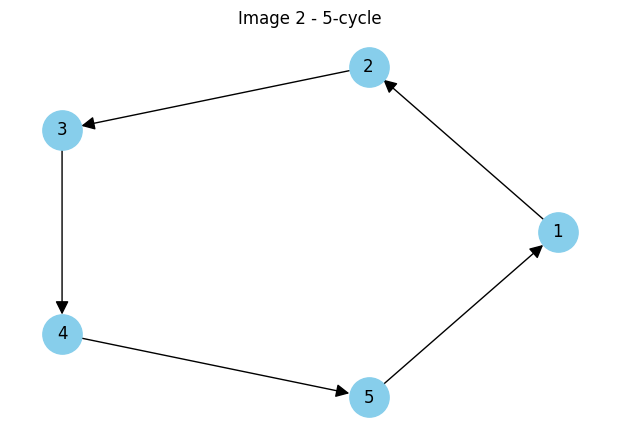

In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Adjacency matrix untuk Image 2 (5-cycle)
num_pages = 5
adjacency_matrix = np.zeros((num_pages, num_pages), dtype=int)
edges = [(1,2), (2,3), (3,4), (4,5), (5,1)]
for u, v in edges:
    adjacency_matrix[v-1, u-1] = 1  # baris target, kolom source

# Create directed graph
G = nx.DiGraph()
G.add_nodes_from(range(1, num_pages+1))
G.add_edges_from(edges)

pos = nx.circular_layout(G)
labels = {i: f"{i}" for i in range(1, num_pages+1)}
plt.figure(figsize=(6,4))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=800, node_color='skyblue', arrowsize=20)
plt.title("Image 2 - 5-cycle")
plt.tight_layout()
plt.show()

# Latihan 3

In [13]:
import numpy as np

num_pages = 4

adj = np.zeros((num_pages, num_pages), dtype=int)
edges = [(1,2), (2,1), (2,3), (3,4), (4,3)]
for u, v in edges:
    adj[v-1, u-1] = 1

outlinks = adj.sum(axis=0)
inlinks = adj.sum(axis=1)

pagerank = np.ones(num_pages, dtype=float) / num_pages
damping_factor = 0.85
num_iterations = 100

for _ in range(num_iterations):
    new_page_rank = np.zeros(num_pages, dtype=float)
    for i in range(num_pages): # Iterate through receiving pages
        for j in range(num_pages): # Iterate through linking pages
            if outlinks[j] > 0 and adj[i, j] == 1: # If there is a link from j to i
                new_page_rank[i] += pagerank[j] / outlinks[j]
            elif outlinks[j] == 0:
                new_page_rank[i] += pagerank[j] / num_pages
    pagerank = (1 - damping_factor) / num_pages + damping_factor * new_page_rank

print("Hasil PageRank (Image 3):")
for i, pr in enumerate(pagerank, start=1):
    print(f"Node {i}: {pr:.6f}")

Hasil PageRank (Image 3):
Node 1: 0.083659
Node 2: 0.108611
Node 3: 0.416341
Node 4: 0.391389


/tmp/ipython-input-3898279006.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


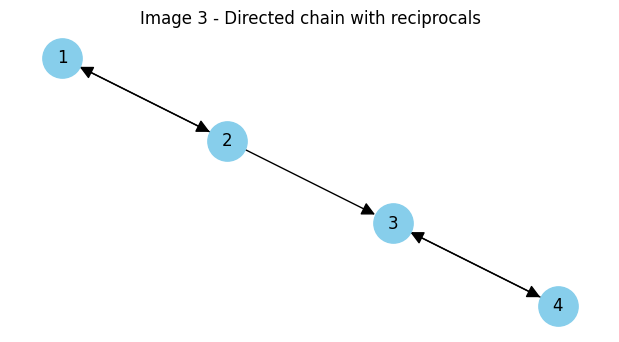

In [14]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

num_pages = 4
adjacency_matrix = np.zeros((num_pages, num_pages), dtype=int)
edges = [(1,2), (2,1), (2,3), (3,4), (4,3)]
for u, v in edges:
    adjacency_matrix[v-1, u-1] = 1

G = nx.DiGraph()
G.add_nodes_from(range(1, num_pages+1))
G.add_edges_from(edges)

pos = {1: (0, 1), 2: (1, 0.5), 3: (2, 0), 4: (3, -0.5)}
labels = {i: f"{i}" for i in range(1, num_pages+1)}
plt.figure(figsize=(6,3))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=800, node_color='skyblue', arrowsize=20)
plt.title("Image 3 - Directed chain with reciprocals")
plt.tight_layout()
plt.show()

# Latihan 4

In [15]:
import numpy as np

num_pages = 6
adj = np.zeros((num_pages, num_pages), dtype=int)
edges = [(1,2), (2,3), (3,4), (4,5), (5,6), (6,1)]
for u, v in edges:
    adj[v-1, u-1] = 1

outlinks = adj.sum(axis=0)
inlinks = adj.sum(axis=1)

pagerank = np.ones(num_pages, dtype=float) / num_pages
damping_factor = 0.85
num_iterations = 100

for _ in range(num_iterations):
    new_page_rank = np.zeros(num_pages, dtype=float)
    for i in range(num_pages): # Iterate through receiving pages
        for j in range(num_pages): # Iterate through linking pages
            if outlinks[j] > 0 and adj[i, j] == 1: # If there is a link from j to i
                new_page_rank[i] += pagerank[j] / outlinks[j]
            elif outlinks[j] == 0:
                new_page_rank[i] += pagerank[j] / num_pages
    pagerank = (1 - damping_factor) / num_pages + damping_factor * new_page_rank

print("Hasil PageRank (Image 4 - 6-cycle):")
for i, pr in enumerate(pagerank, start=1):
    print(f"Node {i}: {pr:.6f}")

Hasil PageRank (Image 4 - 6-cycle):
Node 1: 0.166667
Node 2: 0.166667
Node 3: 0.166667
Node 4: 0.166667
Node 5: 0.166667
Node 6: 0.166667


/tmp/ipython-input-3917094215.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


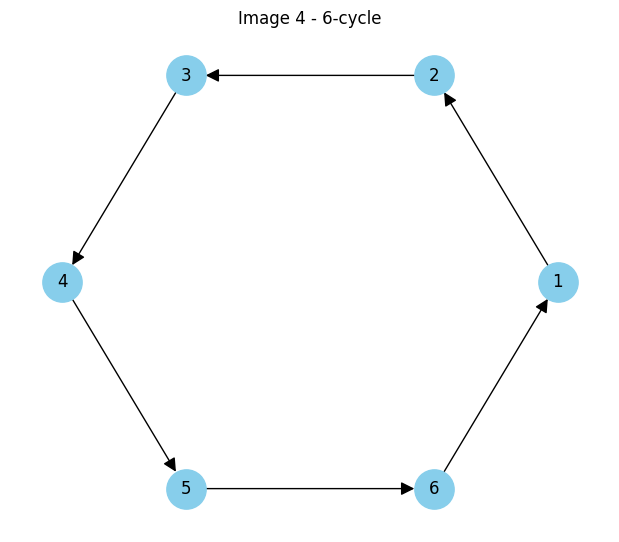

In [16]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Adjacency matrix untuk Image 4 (6-cycle)
num_pages = 6
adjacency_matrix = np.zeros((num_pages, num_pages), dtype=int)
edges = [(1,2), (2,3), (3,4), (4,5), (5,6), (6,1)]
for u, v in edges:
    adjacency_matrix[v-1, u-1] = 1  # baris target, kolom source

# Create directed graph
G = nx.DiGraph()
G.add_nodes_from(range(1, num_pages+1))
G.add_edges_from(edges)

pos = nx.circular_layout(G)
labels = {i: f"{i}" for i in range(1, num_pages+1)}
plt.figure(figsize=(6,5))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=800, node_color='skyblue', arrowsize=20)
plt.title("Image 4 - 6-cycle")
plt.tight_layout()
plt.show()

# Latihan 5

In [21]:
import numpy as np

num_pages = 4

adj = np.zeros((num_pages, num_pages), dtype=int)
edges = [(1,2), (2, 1), (2,3), (3,2), (3,4), (4,3), (4,1)]
for u, v in edges:
    adj[v-1, u-1] = 1

outlinks = adj.sum(axis=0)
inlinks = adj.sum(axis=1)

print("Adjacency Matrix (rows=to, cols=from):")
print(adj)
print("Outlinks per node:", outlinks)
print("Inlinks per node:", inlinks)

pagerank = np.ones(num_pages, dtype=float) / num_pages
damping_factor = 0.85
num_iterations = 100

for _ in range(num_iterations):
    new_page_rank = np.zeros(num_pages, dtype=float)
    for i in range(num_pages): # Iterate through receiving pages
        for j in range(num_pages): # Iterate through linking pages
            if outlinks[j] > 0 and adj[i, j] == 1: # If there is a link from j to i
                new_page_rank[i] += pagerank[j] / outlinks[j]
            elif outlinks[j] == 0:
                new_page_rank[i] += pagerank[j] / num_pages
    pagerank = (1 - damping_factor) / num_pages + damping_factor * new_page_rank

print("Hasil PageRank (Image 5 - 7-cycle):")
for i, pr in enumerate(pagerank, start=1):
    print(f"Node {i}: {pr:.6f}")


Adjacency Matrix (rows=to, cols=from):
[[0 1 0 1]
 [1 0 1 0]
 [0 1 0 1]
 [0 0 1 0]]
Outlinks per node: [1 2 2 2]
Inlinks per node: [2 2 2 1]
Hasil PageRank (Image 5 - 7-cycle):
Node 1: 0.250000
Node 2: 0.356250
Node 3: 0.250000
Node 4: 0.143750


/tmp/ipython-input-3906772451.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


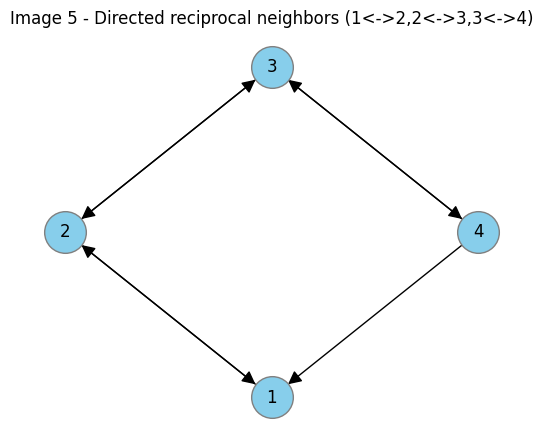

In [19]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

num_pages = 4
adjacency_matrix = np.zeros((num_pages, num_pages), dtype=int)
edges = [(1,2), (2, 1), (2,3), (3,2), (3,4), (4,3), (4,1)]
for u, v in edges:
    adjacency_matrix[v-1, u-1] = 1

G = nx.DiGraph()
G.add_nodes_from(range(1, num_pages+1))
G.add_edges_from(edges)

pos = {1: (1, 0), 2: (0, 0.7), 3: (1, 1.4), 4: (2, 0.7)}
labels = {i: f"{i}" for i in range(1, num_pages+1)}

plt.figure(figsize=(5,4))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=900,
        node_color='skyblue', arrowsize=20, edgecolors='gray')
plt.title("Image 5 - Directed reciprocal neighbors (1<->2,2<->3,3<->4)")
plt.tight_layout()
plt.show()

# Latihan 6

In [20]:
# PageRank calculation for Image 6
# Edges (confirmed): 1->2, 2->3, 3->4, 4->1, 4->5, 5->1
import numpy as np

num_pages = 5

# Build adjacency matrix (rows = target, cols = source)
adj = np.zeros((num_pages, num_pages), dtype=int)
edges = [(1,2), (2,3), (3,4), (4,1), (4,5), (5,1)]  # (from, to)
# Note: edges list uses (from, to) consistent with previous files
for u, v in edges:
    adj[v-1, u-1] = 1

# Outlinks and inlinks vectors
outlinks = adj.sum(axis=0)
inlinks  = adj.sum(axis=1)

print("Adjacency matrix (rows=to, cols=from):")
print(adj)
print("Outlinks per node:", outlinks)
print("Inlinks per node: ", inlinks)

# PageRank params (style sesuai permintaan)
pagerank = np.ones(num_pages, dtype=float) / num_pages
damping_factor = 0.85
num_iterations = 100

for _ in range(num_iterations):
    new_page_rank = np.zeros(num_pages, dtype=float)
    for i in range(num_pages):
        for j in range(num_pages):
            if outlinks[j] > 0 and adj[i, j] == 1:
                new_page_rank[i] += pagerank[j] / outlinks[j]
            elif outlinks[j] == 0:
                # Dangling node -> uniform distribution
                new_page_rank[i] += pagerank[j] / num_pages
    pagerank = (1 - damping_factor) / num_pages + damping_factor * new_page_rank

print("\nHasil PageRank (Image 6):")
for i, pr in enumerate(pagerank, start=1):
    print(f"Node {i}: {pr:.6f}")

Adjacency matrix (rows=to, cols=from):
[[0 0 0 1 1]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]]
Outlinks per node: [1 1 1 2 1]
Inlinks per node:  [2 1 1 1 1]

Hasil PageRank (Image 6):
Node 1: 0.224655
Node 2: 0.220956
Node 3: 0.217813
Node 4: 0.215141
Node 5: 0.121435


/tmp/ipython-input-1247078358.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


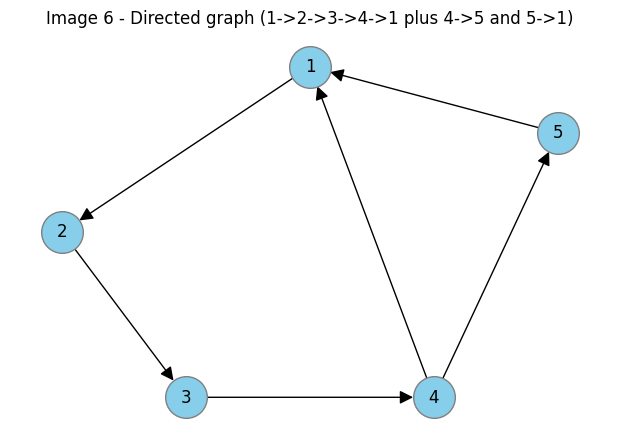

In [22]:
# Graph drawing for Image 6
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

num_pages = 5
adjacency_matrix = np.zeros((num_pages, num_pages), dtype=int)
edges = [(1,2), (2,3), (3,4), (4,1), (4,5), (5,1)]
for u, v in edges:
    adjacency_matrix[v-1, u-1] = 1

G = nx.DiGraph()
G.add_nodes_from(range(1, num_pages+1))
G.add_edges_from(edges)

# Layout: place node 1 top-center, 2 left, 3 bottom-left, 4 bottom-right, 5 top-right
pos = {1: (1, 1), 2: (0, 0.5), 3: (0.5, 0), 4: (1.5, 0), 5: (2, 0.8)}
labels = {i: f"{i}" for i in range(1, num_pages+1)}

plt.figure(figsize=(6,4))
nx.draw(G, pos, with_labels=True, labels=labels, node_size=900,
        node_color='skyblue', arrowsize=20, edgecolors='gray')
plt.title("Image 6 - Directed graph (1->2->3->4->1 plus 4->5 and 5->1)")
plt.tight_layout()
plt.show()

# Latihan 7

In [27]:
# PageRank for image9: mixed cycle + reciprocal pair + dangling 6
import numpy as np

num_pages = 6
edges = [(1,2), (2,3), (3,1),  # triangle cycle
         (4,5), (5,4),        # reciprocal pair
         (3,4),               # connection from cycle to pair
         (5,6)]               # 6 is dangling
A = np.zeros((num_pages, num_pages), dtype=int)
for u, v in edges:
    A[v-1, u-1] = 1

outlinks = A.sum(axis=0)
inlinks = A.sum(axis=1)
print("Adjacency matrix (rows=to, cols=from):")
print(A)
print("Outlinks:", outlinks)
print("Inlinks: ", inlinks)

pagerank = np.ones(num_pages, dtype=float) / num_pages
damping_factor = 0.85
num_iterations = 300

for _ in range(num_iterations):
    new_pr = np.zeros(num_pages, dtype=float)
    for i in range(num_pages):
        for j in range(num_pages):
            if outlinks[j] > 0 and A[i, j] == 1:
                new_pr[i] += pagerank[j] / outlinks[j]
            elif outlinks[j] == 0:
                new_pr[i] += pagerank[j] / num_pages
    pagerank = (1 - damping_factor) / num_pages + damping_factor * new_pr

print("\nHasil PageRank (image9 - mixed):")
for i, pr in enumerate(pagerank, start=1):
    print(f"Node {i}: {pr:.6f}")

Adjacency matrix (rows=to, cols=from):
[[0 0 1 0 0 0]
 [1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 1 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]]
Outlinks: [1 1 2 1 2 0]
Inlinks:  [1 1 1 2 1 1]

Hasil PageRank (image9 - mixed):
Node 1: 0.115588
Node 2: 0.143090
Node 3: 0.166466
Node 4: 0.210794
Node 5: 0.224015
Node 6: 0.140046


/tmp/ipython-input-2731530153.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


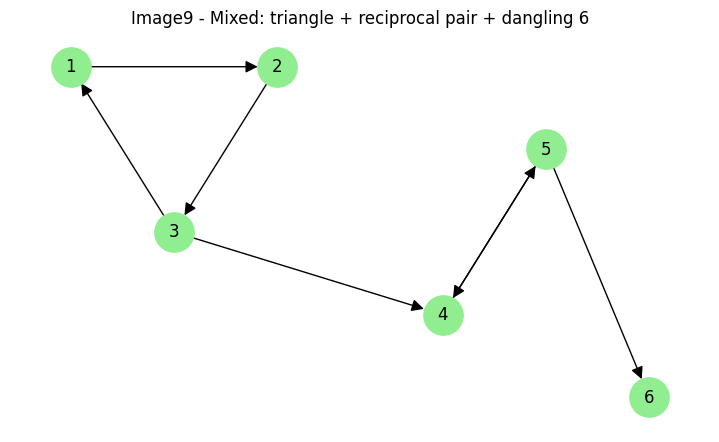

In [28]:
# Draw graph for image9 and save image9_graph.png
import networkx as nx
import matplotlib.pyplot as plt

num_pages = 6
edges = [(1,2),(2,3),(3,1),(4,5),(5,4),(3,4),(5,6)]
G = nx.DiGraph()
G.add_nodes_from(range(1, num_pages+1))
G.add_edges_from(edges)

pos = {1:(0,1), 2:(1,1), 3:(0.5,0.6), 4:(1.8,0.4), 5:(2.3,0.8), 6:(2.8,0.2)}
plt.figure(figsize=(7,4))
nx.draw(G, pos, with_labels=True, node_size=800, node_color='lightgreen', arrowsize=18)
plt.title("Image9 - Mixed: triangle + reciprocal pair + dangling 6")
plt.tight_layout()
plt.savefig("image9_graph.png", dpi=150)
plt.show()